In [1]:
import pandas as pd
import os

In [2]:
# ФИО,Компетенция,"Баллы, ед.","Баллы, %",Баллы по ключевым навыкам,
directory = './Anonimized'
data = {
    'Название команды': [],
    'ФИО участников': [],
    'ФИО': [],
    'Компетенция': [],
    'Баллы, ед.': [],
    'Баллы, %': [],
    'Баллы по ключевым навыкам': []
}

all_competitions = pd.DataFrame(data)
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        csv = pd.read_csv(os.path.join(directory, filename), decimal=",")
        regex_pattern = r'^\w -|^Результат$|^Результат\.\d|^Максимальное значение$|^Максимальное значение\.\d$'
        header_regex_pattern = r'^Название команды$|^ФИО участников$|^ФИО$|^Компетенция$|^Баллы, ед\.$|^Баллы\, \%$|^Баллы по ключевым навыкам$'
        header = csv.filter(regex=header_regex_pattern)
        avg_by_competitions = csv.filter(regex=regex_pattern)
        avg_by_competitions = avg_by_competitions.fillna(0)
        competions_columns_size = avg_by_competitions.columns.size / 3
        i = 0
        while (i < competions_columns_size - 1):
            columns = avg_by_competitions.columns
            avg_by_competitions.iloc[:, i] = avg_by_competitions.apply(lambda row: row[i+2] / row[i+1] , axis=1)
            avg_by_competitions = avg_by_competitions.drop([columns[i + 1], columns[ i + 2 ]], axis=1)
            i = i + 1
        avg_by_competitions = avg_by_competitions.filter(regex= r'^\w -')
        all_competitions = all_competitions.append(header.join(avg_by_competitions))
all_competitions

/tmp/ipykernel_1614715/3100715777.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_competitions = all_competitions.append(header.join(avg_by_competitions))
/tmp/ipykernel_1614715/3100715777.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_competitions = all_competitions.append(header.join(avg_by_competitions))
/tmp/ipykernel_1614715/3100715777.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_competitions = all_competitions.append(header.join(avg_by_competitions))
/tmp/ipykernel_1614715/3100715777.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_competitions = all_competitions.append(header.join(avg_by_com

,Название команды,ФИО участников,ФИО,Компетенция,"Баллы, ед.","Баллы, %",Баллы по ключевым навыкам,A - Организация работы и управление.,B - Компетенции в области коммуникаций и межличностных отношений.,C - Чтение чертежей.,...,E - Вынос в натуру основных осей проектируемого здания,"F - Топографическая съемка участка строительства, вычисление объёма насыпи","G - Камеральная обработка результатов измерений, составление пояснительной записки","A - Выполнение размеров, модуль1.","B - Выполнение размеров, модуль 2.",C - Шероховатости поверхностей.,D - Выполнение элементов.,E - Дополнительная заготовка.,F - Царапины и деффекты,J - Техника безопасности
0,"АО ""КОНЦЕРН ТИТАН 2"" Команд 1",ФИО_478; ФИО_123; ФИО_220,NaN,Бетонные строительные работы,100.0,77.88,77.88,0.86,0.700,0.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"АО ""КОНЦЕРН ТИТАН 2"" Команд 2",ФИО_330; ФИО_564; ФИО_573,NaN,Бетонные строительные работы,100.0,81.83,81.83,0.84,0.700,0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,НИКИМТ,ФИО_175; ФИО_332; ФИО_344,NaN,Бетонные строительные работы,100.0,70.78,70.78,0.78,0.700,0.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Рос СЭМ,ФИО_173; ФИО_617; ФИО_708,NaN,Бетонные строительные работы,100.0,63.23,63.23,0.74,0.700,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ФГУП ""Комбинат"" Электрохимприбор""",ФИО_205; ФИО_671; ФИО_674,NaN,Бетонные строительные работы,100.0,51.8,51.80,0.84,0.634,0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,NaN,NaN,ФИО_81,Фрезерные работы на станках с ЧПУ,100.0,54.04,54.04,NaN,NaN,NaN,...,NaN,NaN,NaN,0.316267,0.764267,0.9,0.267,1.0,0.3375,0.0
3,NaN,NaN,ФИО_223,Фрезерные работы на станках с ЧПУ,100.0,43.11,43.11,NaN,NaN,NaN,...,NaN,NaN,NaN,0.571200,0.209600,0.5,0.533,1.0,0.0000,0.0
4,NaN,NaN,ФИО_423,Фрезерные работы на станках с ЧПУ,100.0,40.57,40.57,NaN,NaN,NaN,...,NaN,NaN,NaN,0.333333,0.415200,0.9,0.200,1.0,0.0000,0.0
5,NaN,NaN,ФИО_509,Фрезерные работы на станках с ЧПУ,100.0,63.82,63.82,NaN,NaN,NaN,...,NaN,NaN,NaN,0.404800,0.807733,0.8,0.700,1.0,0.3375,0.0


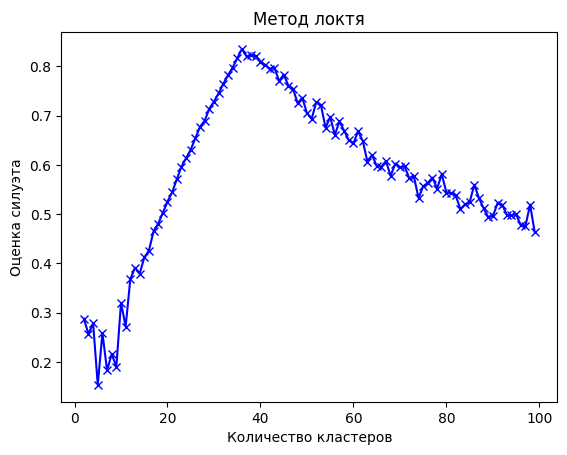

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
# Выбор полей для кластеризации
field_competitions_points = all_competitions.columns[7:]

# Кластеризация
all_competitions.replace([np.inf, -np.inf], np.nan, inplace=True)
all_competitions = all_competitions.fillna(-1)
# kmeans = KMeans(n_clusters=100)  # Задайте желаемое количество кластеров
# all_competitions['Метка кластера'] = kmeans.fit_predict(all_competitions[field_competitions_points].fillna(-1))


scores = []
k_values = range(2, 100)  # Задайте диапазон возможных количеств кластеров

# Вывод DataFrame с меткой кластера
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_competitions[field_competitions_points])
    scores.append(metrics.silhouette_score(all_competitions[field_competitions_points], kmeans.labels_))

# Визуализация результатов
plt.plot(k_values, scores, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Метод локтя')
plt.show()